# import & load data

In [2]:
%run imports_N_loadDenoised.ipynb

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


In [33]:
pressure_measure=pressure_measure_denoised
pressure_time=pressure_time_denoised
ground_truth=ground_truth_denoised
pressure_df=pressure_df_denoised
rate_df=rate_df_denoised
colum_names=colum_names_denoised
data_inOneRow=data_inOneRow_denoised

# detect with pattern recognition

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
start to predict using pattern...
before filter, the length of buildup 1190, the length of drawdown 449
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
after filter, the results are filtered further, there are 1142 detected buildup points, 235 drawdown detected
===============output==================
 buildup_PR: 1142, d

<Figure size 1440x720 with 0 Axes>

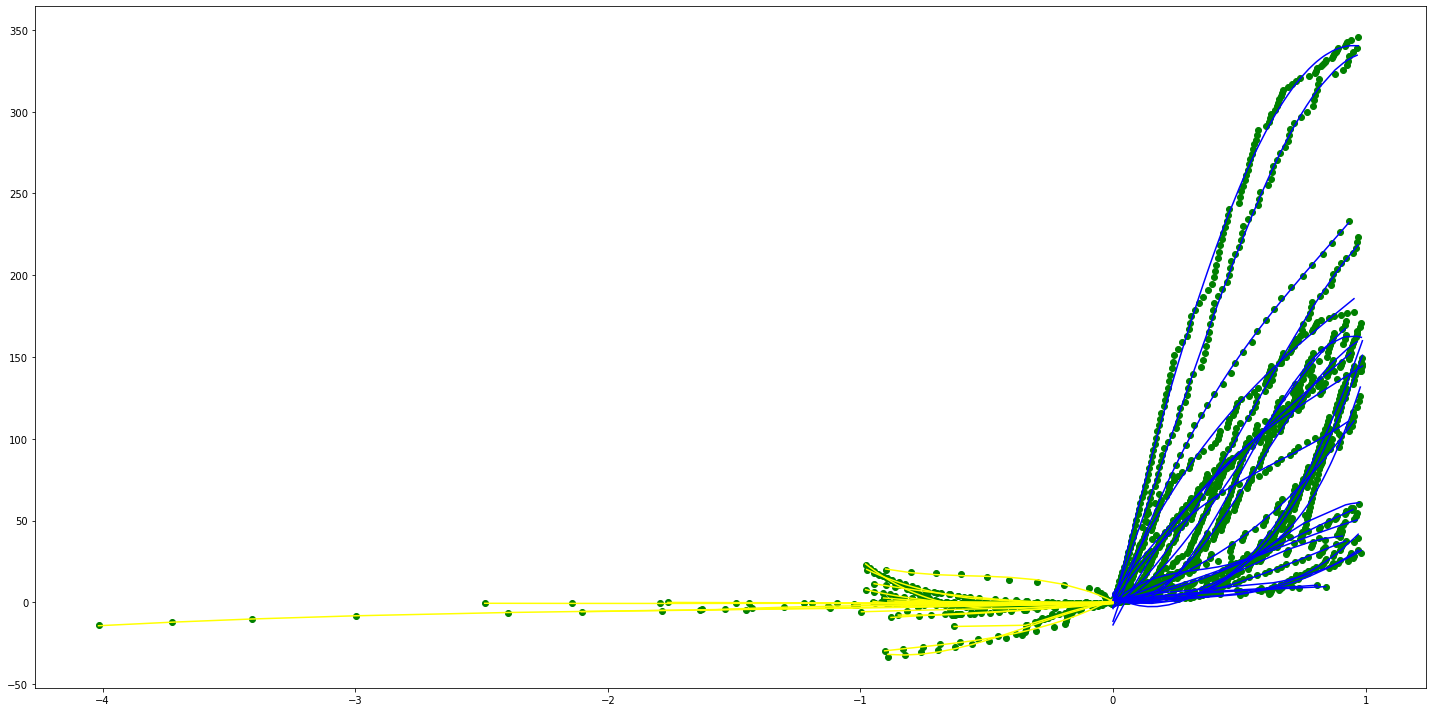

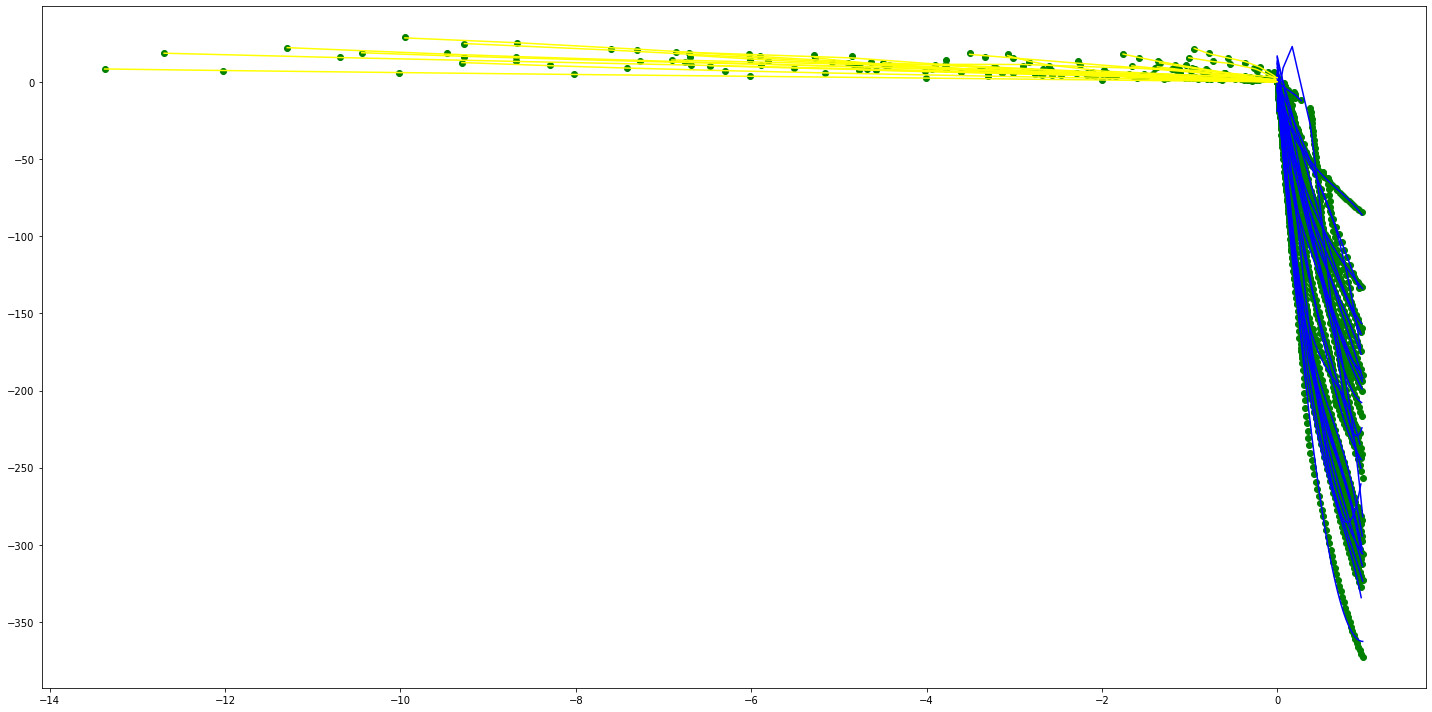

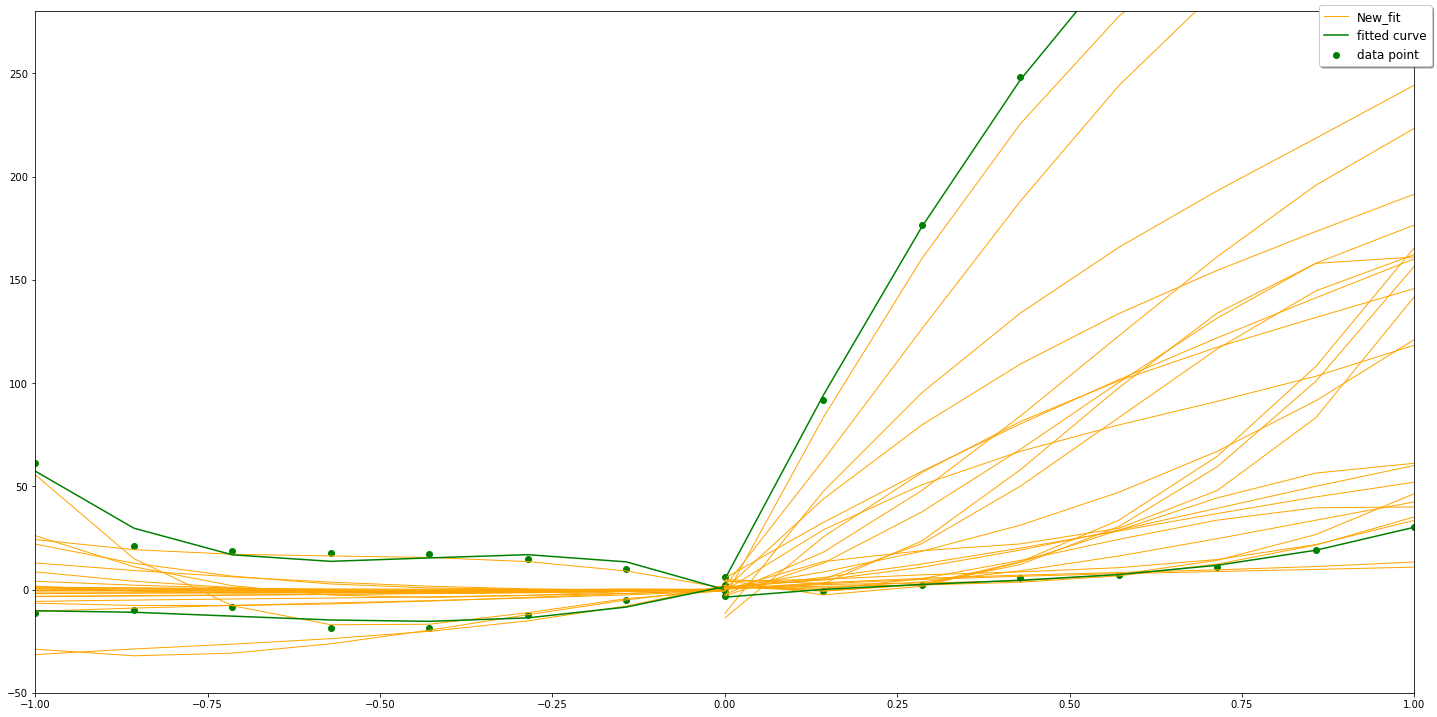

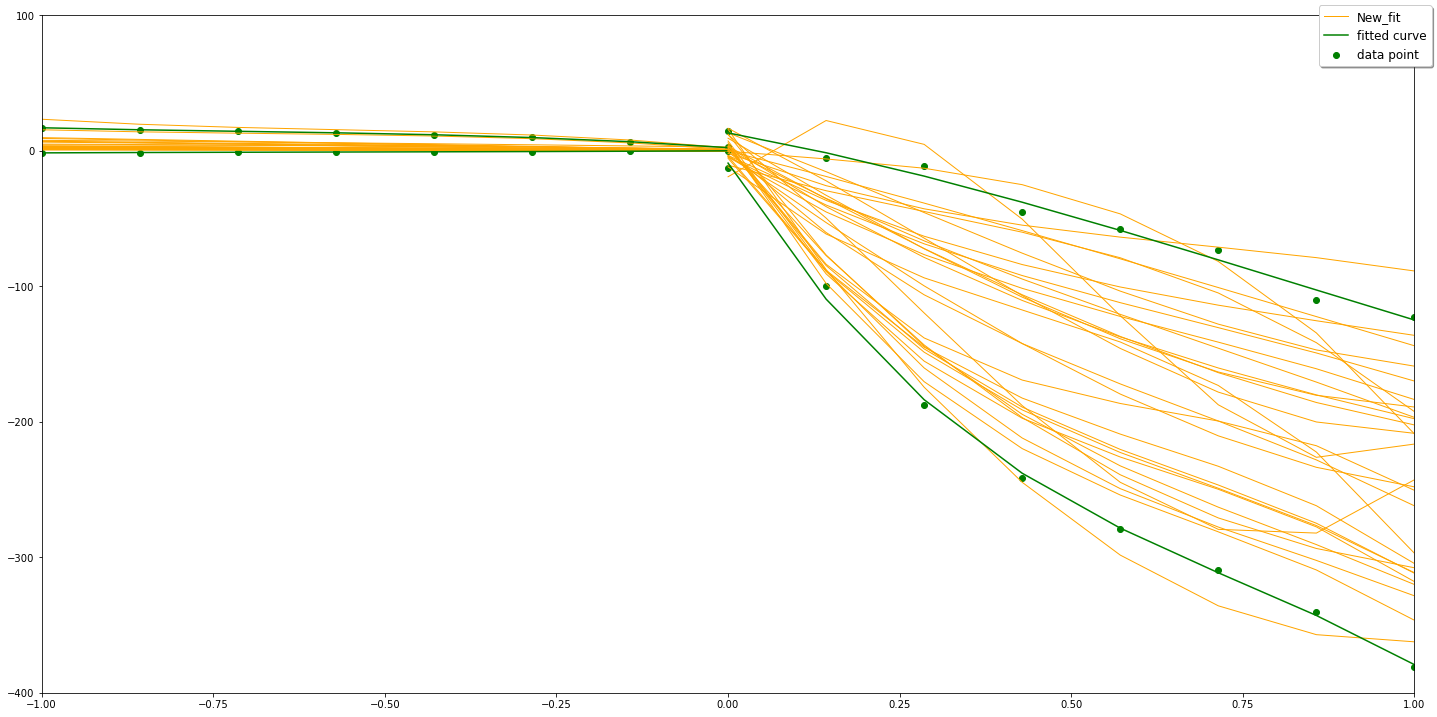

<Figure size 1440x720 with 0 Axes>

In [34]:
time_halfWindow=1
fitting_type="polynomial"
points=[index for index in range(len(pressure_measure))]
%run detect_usePatternRecognition.ipynb

# filter use Delta Tangent 

In [35]:
point_halfWindow=10
time_halfWindow=None
polynomial_order=1
tangent_type="single_point"
# polynomial_order=3
# tangent_type="average"
deltaTangent_criterion=10
points=buildup_PR+drawdown_PR
%run detect_useDeltaTangent.ipynb

start to predict using tangent...
-------calculate_Parameters_allCurve using 'polynomial' fitting
detect 755 buildups and 117 drawdowns 
===============output==================
'buildup_DT: 755,drawdown_DT: 117'


<Figure size 1440x720 with 0 Axes>

# filter with maximum first order derivative

In [41]:
points=[buildup_DT,drawdown_DT]
# points=[buildup_PR,drawdown_PR]
time_step=1
%run detect_useMaxFirstDerivative.ipynb

methods\derivative_method.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 755,len(buildUp_max_FOD): 171'
'len(drawDown_df): 117,len(drawDown_max_FOD): 38'
===============output==================
Max_FOD


# plot & save

In [42]:
time_halfWindow=1
txt=print_tuning_parameters(percentile_tuning,fine_tuning)
txt=txt+f"\ntime_halfWindow:{time_halfWindow}\n"
txt+=f"buildup:{len(Max_FOD[0])}, drawdown:{len(Max_FOD[1])}"
pprint(txt)

('percentile_tuning======\n'
 'buildUp:\n'
 "{'left': [100, 10], 'right': [100, 10]}\n"
 'drawDown:\n'
 "{'left': [95, 6], 'right': [95, 3]}\n"
 '\n'
 'fine_tuning===========\n'
 'buildUp:\n'
 "{'left_top': 1.1, 'left_bottom': 1.1, 'right_top': 1.1, 'right_bottom': "
 '0.9}\n'
 'drawDown:\n'
 "{'left_top': 1.1, 'left_bottom': -1.1, 'right_top': 0.9, 'right_bottom': "
 '1.1}\n'
 '\n'
 'time_halfWindow:1\n'
 'buildup:171, drawdown:38')


In [ ]:
_point_halfWindow_{point_halfWindow}
_{tangent_type}_polyOrder_{polynomial_order}_deltaTangent_criterion_{deltaTangent_criterion}
PatternRecognition_N_DeltaTangent_N_MFOD

---initializing...
---plotting...


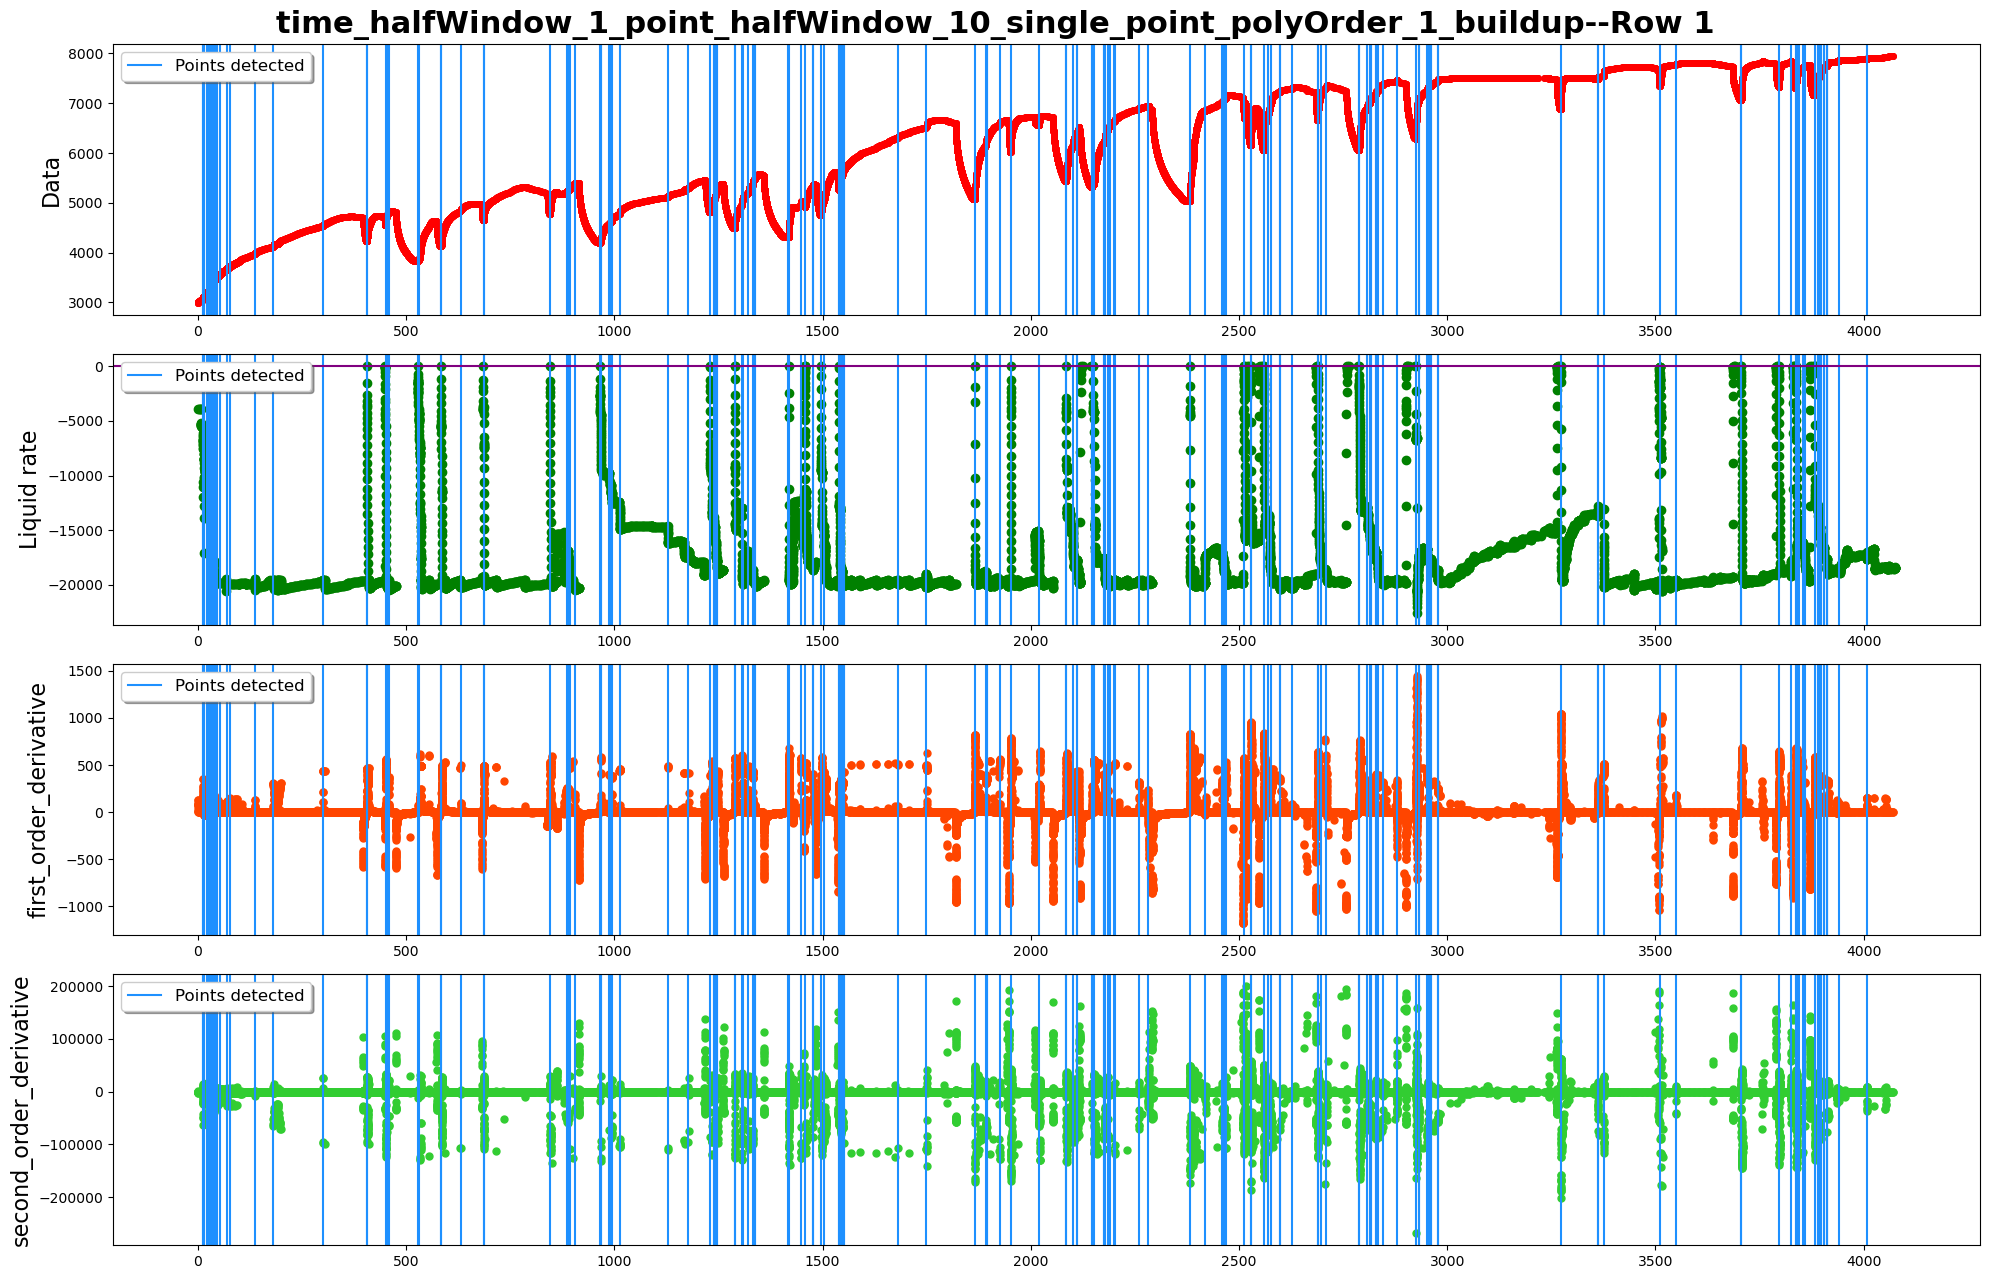

save whole....
detected 171 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[32, 33, 287, 366, 370, 434, 471, 510, 601, 696, 842, 855, 875, 1032]
------row 2-----detected points:[1360, 1440, 1730, 1814, 2111]
------row 3-----detected points:[2477, 2480, 2897, 2991, 2994, 3024, 3561]
------row 4-----detected points:[3602, 4231, 4247, 4653]
------row 5-----detected points:[4899, 4911, 5449, 5834, 5853, 5889, 5947]
------row 6-----detected points:[6544, 6571, 6576, 6739, 6769, 6772, 6869, 7039, 7139]
------row 7-----detected points:[7556, 7685, 7691, 7716, 7775, 7816, 7821, 8362, 8374]
------row 8-----detected points:[8597, 8688, 8776, 8873, 8938, 8940]
------row 9-----detected points:[9605, 9619, 10066, 10238, 10451, 10466]
------row 10-----detected points:[10812, 10948, 11481, 11496, 11593, 11743, 11749, 11835, 11836]
------row 11-----detected points:[12137, 12241, 13040]
------row 12-----detected points:[13528, 13601, 13602, 13775, 14093]
------ro

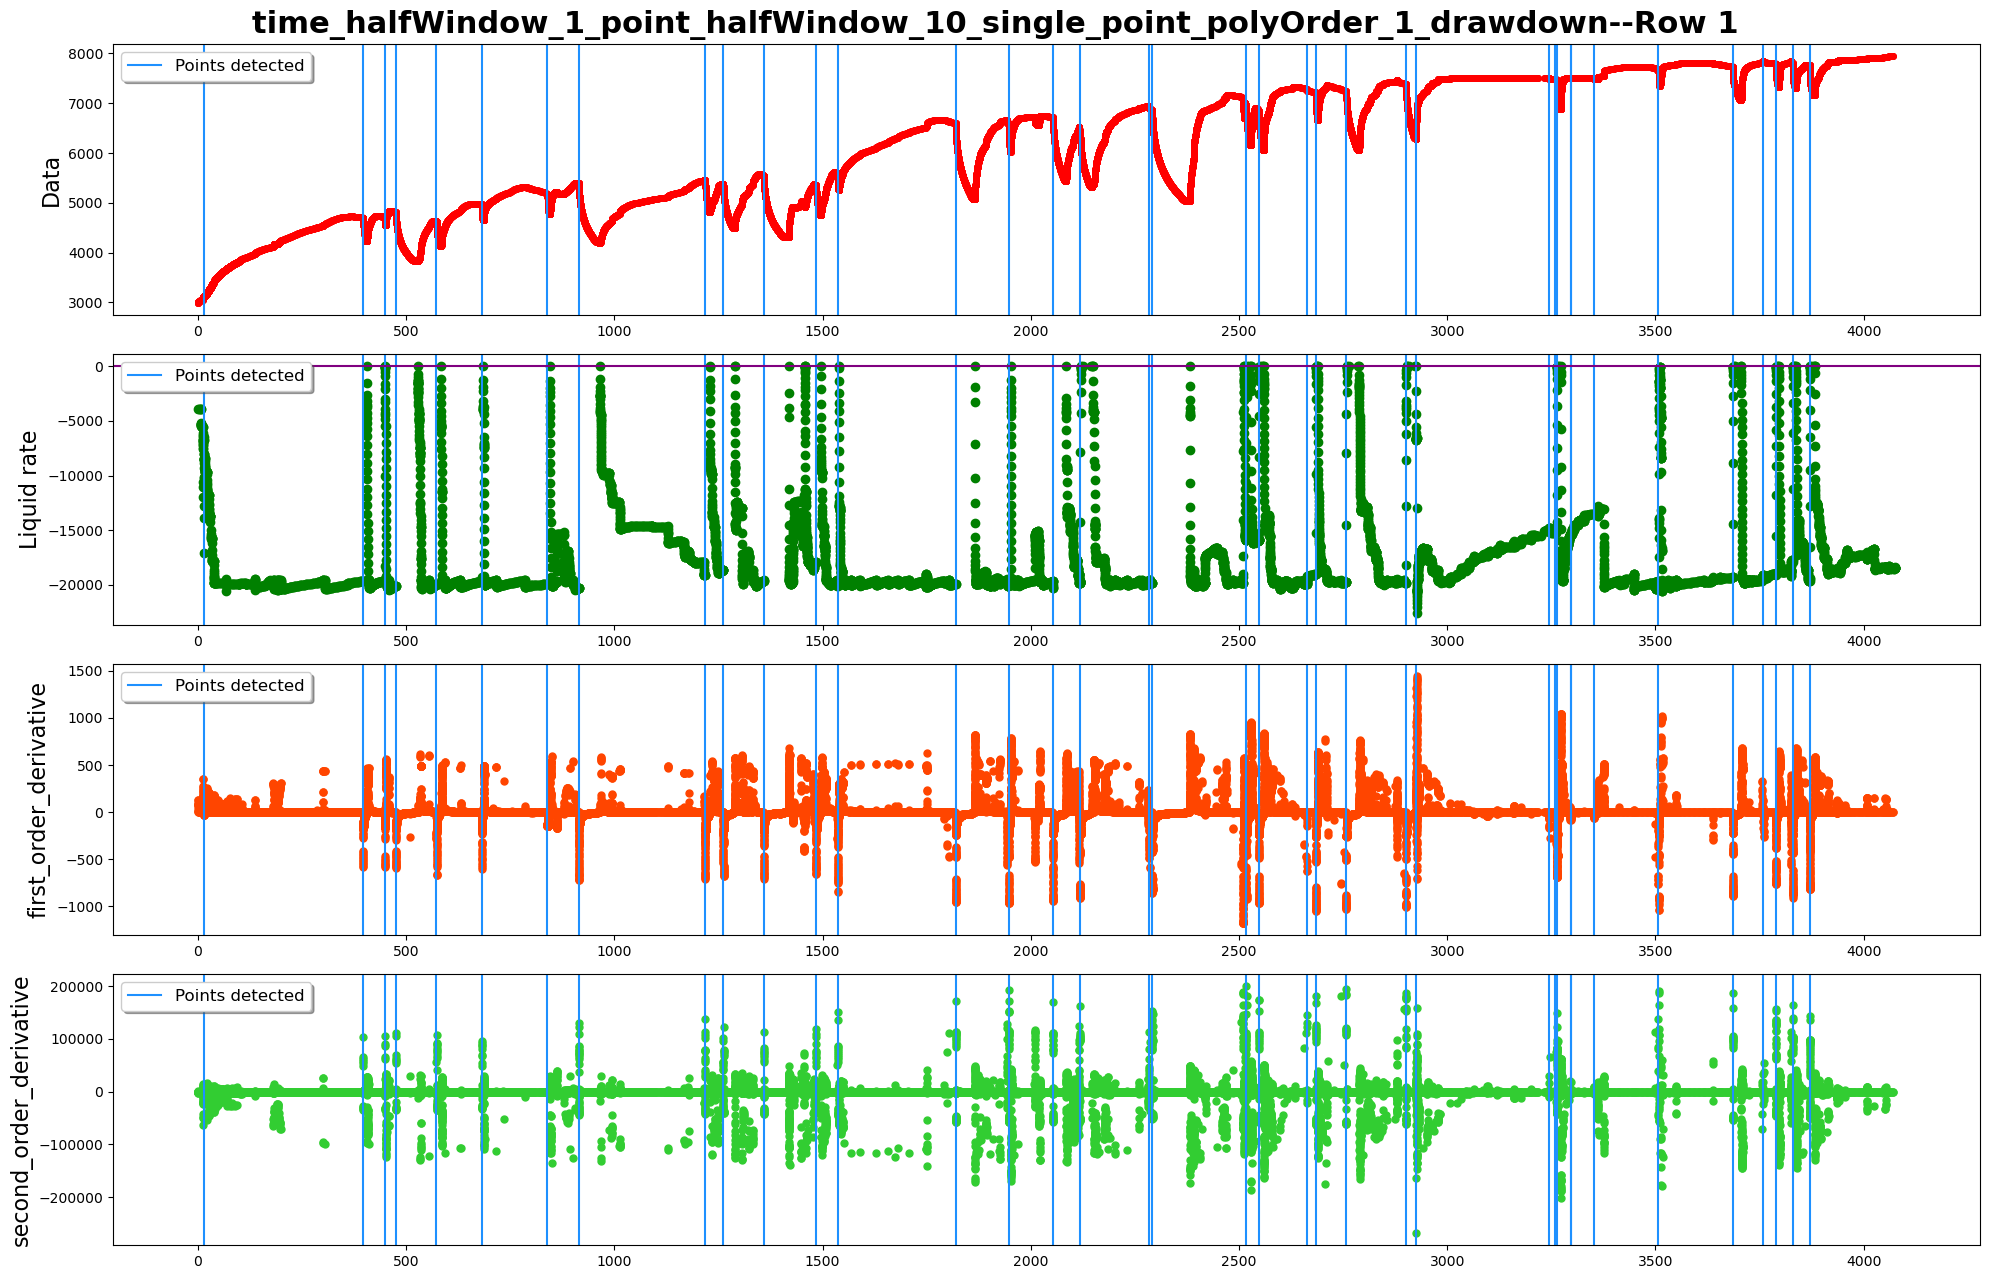

save whole....
detected 38 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[244]
------row 2-----detected points:[2249]
------row 3-----detected points:[2805, 3097]
------row 4-----detected points:[3991, 4752]
------row 5-----detected points:[5298, 5986]
------row 6-----detected points:[]
------row 7-----detected points:[7251, 7949]
------row 8-----detected points:[9025]
------row 9-----detected points:[10528]
------row 10-----detected points:[11341]
------row 11-----detected points:[12363]
------row 12-----detected points:[13868]
------row 13-----detected points:[14768]
------row 14-----detected points:[16095]
------row 15-----detected points:[17552, 17590]
------row 16-----detected points:[]
------row 17-----detected points:[20014]
------row 18-----detected points:[20701]
------row 19-----detected points:[21952, 21975, 22710]
------row 20-----detected points:[]
------row 21-----detected points:[24216, 24676]
------row 22-----detected points:[256

In [46]:
#plot & save
plot_whole=True
plot_details=False
plot_statistics=False
points_toPlot=[Max_FOD[0],Max_FOD[1]]
names=["buildup","drawdown"]
for points,name in zip(points_toPlot,names):    
    filename_toSave_whole=f"../data_output/PatternRecognition_DeltaTangent_MFOD/deltaTangent_criterion_{deltaTangent_criterion}/time_halfWindow_{time_halfWindow}_point_halfWindow_{point_halfWindow}_polyOrder_{polynomial_order}_{name}_whole.pdf"
    os.makedirs(os.path.dirname(filename_toSave_whole), exist_ok=True)
    filename_toSave_details=f"../data_output/PatternRecognition_DeltaTangent_MFOD/deltaTangent_criterion_{deltaTangent_criterion}/time_halfWindow_{time_halfWindow}_point_halfWindow_{point_halfWindow}_polyOrder_{polynomial_order}_{name}_details.pdf"
#     os.makedirs(os.path.dirname(filename_toSave_details), exist_ok=True)
    plot_name=f"time_halfWindow_{time_halfWindow}_point_halfWindow_{point_halfWindow}_{tangent_type}_polyOrder_{polynomial_order}_{name}"
    PlotNSave(pressure_df,
      rate_df,
      points,
      [],
      data_inOneRow,
      plot_name,
              txt,
      filename_toSave_whole,
      filename_toSave_details,
      plot_statistics,
      plot_whole,
      plot_details,
      colum_names)
     